# State Farm Distracted Driver Detection with ResNet50 and Transfer Learning
In this project, we aim to develop a deep learning model for detecting distracted drivers using the State Farm Distracted Driver Detection dataset. We leverage the power of transfer learning with the ResNet50 architecture to achieve high performance with limited labeled data.

## Import libraries

### Imports Description:

1. **os:**
   - The `os` module provides functions for interacting with the operating system. It is commonly used for file and directory operations.

2. **pandas as pd:**
   - The `pandas` library is widely used for data manipulation and analysis in Python. It provides data structures and functions to work with structured data, often in the form of DataFrames.

3. **pickle:**
   - The `pickle` module is used for serializing and deserializing Python objects. It allows objects to be saved to a file and loaded back into memory.

4. **numpy as np:**
   - The `numpy` library is a fundamental package for numerical computing in Python. It provides support for multidimensional arrays and matrices, along with a wide range of mathematical functions.

5. **seaborn:**
   - Seaborn is a statistical data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

6. **secrets:**
   - The `secrets` module is used for generating cryptographically secure random numbers suitable for managing data such as passwords, account authentication, and tokens.

7. **cv2:**
   - OpenCV (Open Source Computer Vision Library) is a popular computer vision library. `cv2` is a Python wrapper for OpenCV, providing functions for image and video processing.

8. **PIL (Python Imaging Library):**
   - The `PIL` module provides functions for opening, manipulating, and saving many different image file formats. It is commonly used for image processing tasks.

9. **ImageFile:**
   - The `ImageFile` module provides utilities for working with image files. It is often used in conjunction with the `PIL` library.

10. **load_files from sklearn.datasets:**
    - The `load_files` function from `sklearn.datasets` is used to load datasets stored in a specific directory structure. It is commonly used for loading datasets for machine learning tasks.

11. **matplotlib.pyplot as plt:**
    - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. `pyplot` is a collection of functions that make matplotlib work like MATLAB.

12. **Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense from keras.layers:**
    - These are various layers used in building convolutional neural networks (CNNs) using the Keras deep learning framework. They are building blocks for constructing neural network architectures.

13. **Sequential from keras.models:**
    - The `Sequential` model is a linear stack of layers in Keras. It is the simplest type of model, where each layer has exactly one input tensor and one output tensor.

14. **ModelCheckpoint from keras.callbacks:**
    - `ModelCheckpoint` is a callback in Keras that allows the model to be saved during training based on certain conditions, such as the improvement in validation loss.

15. **to_categorical from keras.utils:**
    - The `to_categorical` function is used to convert class vector (integers) to binary class matrix for use with categorical_crossentropy loss function.

16. **confusion_matrix from sklearn.metrics:**
    - The `confusion_matrix` function computes the confusion matrix to evaluate the accuracy of a classification.

17. **image from keras.preprocessing:**
    - The `image` module from Keras provides functions for loading and preprocessing images for deep learning tasks.

18. **tqdm:**
    - `tqdm` is a Python library that provides a fast, extensible progress bar for loops and functions. It's used to track the progress of iterative tasks.

19. **ImageDataGenerator from tensorflow.keras.preprocessing.image:**
    - `ImageDataGenerator` is used for generating batches of augmented/normalized data for training deep learning models.

20. **random:**
    - The `random` module provides functions for generating random numbers and shuffling sequences. It is commonly used for tasks that require randomness or shuffling.

21. **accuracy_score, precision_score, recall_score, f1_score from sklearn.metrics:**
    - These functions from `sklearn.metrics` are used for evaluating the performance of classification models based on various metrics such as accuracy, precision, recall, and F1-score.



In [1]:
import os
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import secrets
import cv2
from PIL import Image
from PIL import ImageFile
from sklearn.datasets import load_files
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image                  
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random




import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

2024-04-04 10:58:37.887308: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 10:58:37.887406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 10:58:38.185546: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data Visualization

In [3]:
train_dir = "/kaggle/input/state-farm-distracted-driver-detection/imgs/train/"

## The Code below does the following:

1. **Label Definition:**
   - Defines a list `labels` containing class labels 'c0' to 'c9'.

2. **Random Image Selection:**
   - Randomly selects one image per class from the training directory for each class ('c0' to 'c9').
   - Generates the file paths for the randomly selected images for each class.

3. **Reading Images:**
   - Reads the randomly selected images using OpenCV (`cv2.imread`) and converts them from BGR to RGB color format.

4. **Displaying Images:**
   - Defines variables `display_rows` and `display_columns` to set the layout of the image display grid.
   - Creates a figure (`fig`) with a size of 20x20 inches.
   - Iterates over the labels and corresponding image paths, adding each image to the figure.
   - Displays the images in a grid layout with specified rows and columns, along with their corresponding labels as titles.

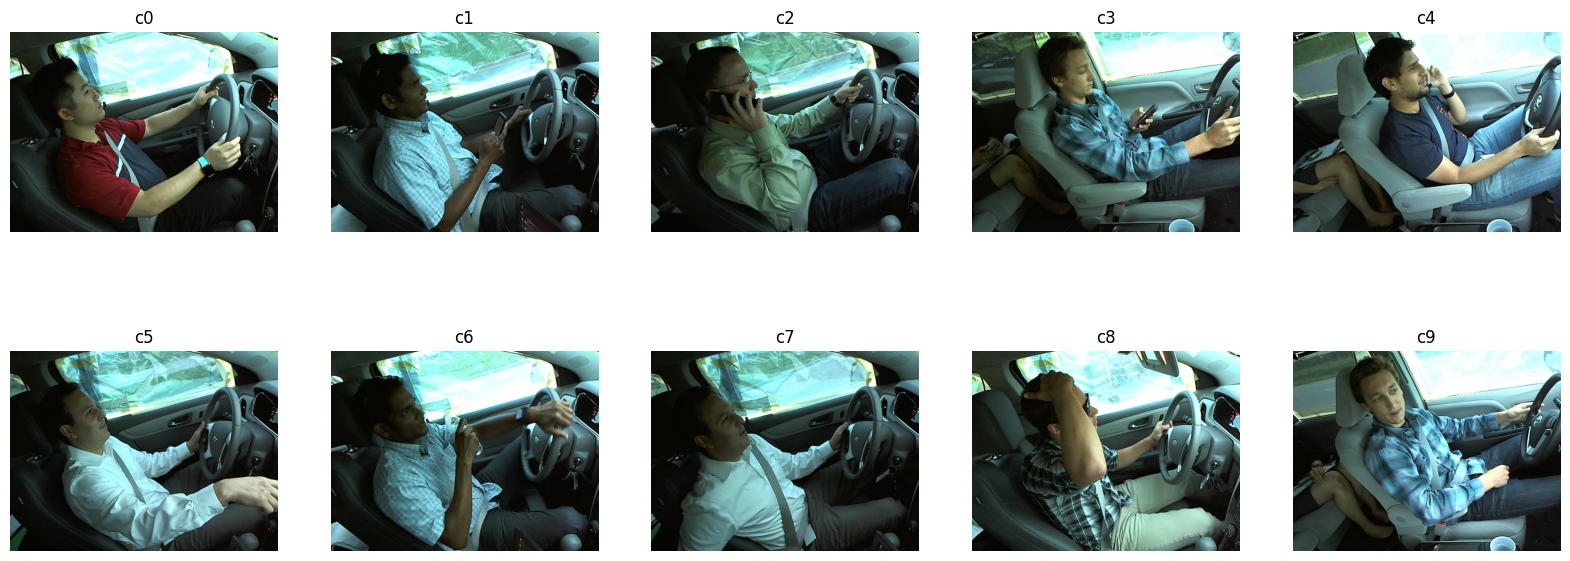

In [4]:
labels = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

#randomly selecting one image per class

img_c0_path = train_dir + "c0/" + random.choice(os.listdir(train_dir + "c0/"))
img_c1_path = train_dir + "c1/" + random.choice(os.listdir(train_dir + "c1/"))
img_c2_path = train_dir + "c2/" + random.choice(os.listdir(train_dir + "c2/"))
img_c3_path = train_dir + "c3/" + random.choice(os.listdir(train_dir + "c3/"))
img_c4_path = train_dir + "c4/" + random.choice(os.listdir(train_dir + "c4/"))
img_c5_path = train_dir + "c5/" + random.choice(os.listdir(train_dir + "c5/"))
img_c6_path = train_dir + "c6/" + random.choice(os.listdir(train_dir + "c6/"))
img_c7_path = train_dir + "c7/" + random.choice(os.listdir(train_dir + "c7/"))
img_c8_path = train_dir + "c8/" + random.choice(os.listdir(train_dir + "c8/"))
img_c9_path = train_dir + "c9/" + random.choice(os.listdir(train_dir + "c9/"))

# reading the images
imgs = {}

imgs["c0"] = cv2.cvtColor(cv2.imread(img_c0_path), cv2.COLOR_BGR2RGB)
imgs["c1"] = cv2.cvtColor(cv2.imread(img_c1_path), cv2.COLOR_BGR2RGB)
imgs["c2"] = cv2.cvtColor(cv2.imread(img_c2_path), cv2.COLOR_BGR2RGB)
imgs["c3"] = cv2.cvtColor(cv2.imread(img_c3_path), cv2.COLOR_BGR2RGB)
imgs["c4"] = cv2.cvtColor(cv2.imread(img_c4_path), cv2.COLOR_BGR2RGB)
imgs["c5"] = cv2.cvtColor(cv2.imread(img_c5_path), cv2.COLOR_BGR2RGB)
imgs["c6"] = cv2.cvtColor(cv2.imread(img_c6_path), cv2.COLOR_BGR2RGB)
imgs["c7"] = cv2.cvtColor(cv2.imread(img_c7_path), cv2.COLOR_BGR2RGB)
imgs["c8"] = cv2.cvtColor(cv2.imread(img_c8_path), cv2.COLOR_BGR2RGB)
imgs["c9"] = cv2.cvtColor(cv2.imread(img_c9_path), cv2.COLOR_BGR2RGB)

# displaying the images
display_rows = 5
display_columns = 5
fig = plt.figure(figsize=(20, 20))

for label, index in zip(labels, range(10)):
    fig.add_subplot(display_rows, display_columns, index + 1)
    plt.imshow(imgs[label])
    plt.axis('off')
    plt.title(label)

## Function Description: `plot_train_history`

This function plots the training and validation accuracy as well as the training and validation loss over epochs.

### Parameters:
- `history`: A Keras `History` object containing training/validation loss and accuracy history.

### Functionality:
- Plots the training and validation accuracy over epochs using `plt.plot()` for both the training and validation datasets.
- Adds titles, labels, and legends to the accuracy plot.
- Plots the training and validation loss over epochs using `plt.plot()` for both the training and validation datasets.
- Adds titles, labels, and legends to the loss plot.
- Displays both plots using `plt.show()`.

### Usage:
```python
plot_train_history(history)


In [5]:
def plot_train_history(history):
    """
    Plot the validation accuracy and validation loss over epochs
    """
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Data distribution


The code bellow generates a bar plot to visualize the distribution of samples across different classes in a dataset.

### Steps:
1. **Creating a Dictionary of Sample Counts:**
   - Initializes an empty dictionary `samples`.
   - Iterates over the list of class labels (`labels`), and for each label:
     - Counts the number of samples in the corresponding directory using `os.listdir`.
     - Stores the count in the `samples` dictionary with the label as the key.

2. **Creating a DataFrame from the Dictionary:**
   - Constructs a DataFrame `samples_df` from the `samples` dictionary using `pd.DataFrame.from_dict()`.

3. **Plotting the Bar Plot:**
   - Uses seaborn's `sns.barplot()` function to create a bar plot from the data in `samples_df`.
   - Displays the bar plot using `plt.show()`.



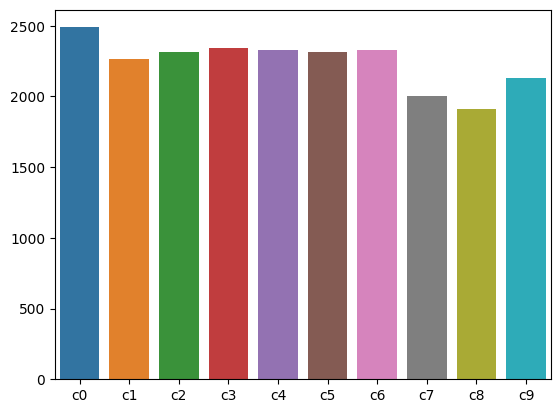

In [6]:
samples = {}
for label in labels:
    samples[label] = [len(os.listdir(train_dir + label + "/"))]

samples_df = pd.DataFrame.from_dict(samples)
sns.barplot(data = samples_df)
plt.show()

## Hyperparameters

## Variable Assignments Description:

The following variables are assigned with specific values for configuring a deep learning model:

1. **`batch_size`:**
   - Specifies the batch size used for training the model. It determines the number of samples processed before the model's internal parameters are updated.

2. **`base_learning_rate`:**
   - Sets the base learning rate for the optimizer. It determines the step size taken during optimization to update the model's parameters.

3. **`base_momentum`:**
   - Defines the base momentum value for the optimizer. Momentum helps accelerate gradient descent by adding a fraction of the previous update to the current update.

4. **`initial_epochs`:**
   - Specifies the number of epochs for the initial training phase of the model. An epoch refers to one complete pass through the entire dataset during training.

5. **`fine_tune_epochs`:**
   - Specifies the number of epochs for the fine-tuning phase of the model. Fine-tuning involves further training the model on a smaller learning rate to fine-tune its parameters.

6. **`fine_tune_at`:**
   - Determines the layer from which fine-tuning will start. It indicates the index of the layer in the model's architecture.

7. **`drop_out_rate`:**
   - Sets the dropout rate, which is the fraction of input units to drop during training. It helps prevent overfitting by randomly dropping units from the neural network.

8. **`initial_patience`:**
   - Specifies the patience parameter for early stopping during the initial training phase. Patience determines the number of epochs to wait for improvement before terminating training.

9. **`fine_tune_patience`:**
   - Sets the patience parameter for early stopping during the fine-tuning phase. Similar to `initial_patience`, it determines the number of epochs to wait for improvement before stopping training.




In [7]:
batch_size = 32
base_learning_rate = 0.001
base_momentum=0.9
initial_epochs = 30
fine_tune_epochs = 40
fine_tune_at = 4
drop_out_rate = 0.2
initial_patience = 3
fine_tune_patience = 2

## Data loading and augmentation


TensorFlow and Keras are used to set up data augmentation for image data and create training and validation datasets.

### Steps:

1. **Importing Libraries:**
   - Imports TensorFlow (`tf`) and the `ImageDataGenerator` class from `tensorflow.keras.preprocessing.image` module.

2. **Defining Image Parameters:**
   - Sets the desired image size (`IMG_SIZE`) to (224, 224).
   - Constructs the image shape (`IMG_SHAPE`) by concatenating `IMG_SIZE` with `(3,)` to represent the image dimensions along with the number of color channels (RGB).

3. **Defining Model Configuration Parameters:**
   - Sets `BASE_MODEL_LAYER` to 1 to specify the layer from which fine-tuning will start.
   - Defines the `batch_size` for the training and validation datasets.

4. **Data Augmentation:**
   - Configures an `ImageDataGenerator` object (`data_augmentation`) for data augmentation, specifying various augmentation techniques such as rotation, width and height shifting, zooming, and horizontal flipping.
   - Specifies `preprocess_input` function from `tf.keras.applications.resnet50` to preprocess input images, including normalization.
   - Sets `fill_mode` to 'nearest' to determine the strategy for filling in newly created pixels during augmentation.
   - Specifies `validation_split` as 0.2 to split the dataset into training and validation subsets.

5. **Creating Training and Validation Datasets:**
   - Generates training and validation datasets using `flow_from_directory` method of `data_augmentation` object.
   - Specifies the training and validation directories (`train_dir`).
   - Sets the target size of images to `IMG_SIZE`.
   - Specifies the batch size as `batch_size`.
   - Sets `class_mode` to 'sparse' for sparse categorical labels.

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
BASE_MODEL_LAYER = 1
batch_size = 50

preprocess_input = tf.keras.applications.resnet50.preprocess_input

data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input, # I have to make it such that some of the augmented images are the focused versions. Not everyone. Now it would be probabilistically everyone as I am preprocessing it like this with probability = 0.5
    validation_split=0.2
)

training_dataset = data_augmentation.flow_from_directory(train_dir,
                                                        subset="training",
                                                        target_size=IMG_SIZE,
                                                        batch_size=batch_size,
                                                        class_mode='sparse')
validation_dataset = data_augmentation.flow_from_directory(train_dir,
                                                        subset="validation",
                                                        target_size=IMG_SIZE,
                                                        batch_size=batch_size,
                                                        class_mode='sparse')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


## ResNet 50 Transfer Learning

In [9]:
from tensorflow.keras.applications import ResNet50

conv_base = ResNet50(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
conv_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.build(input_shape=(None, 224, 224, 3))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,280,650 (187.99 MB)

 Trainable params: 49,227,530 (187.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [14]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 216


In [15]:
conv_base.trainable = False

In [16]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,280,650 (187.99 MB)

 Trainable params: 25,692,938 (98.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

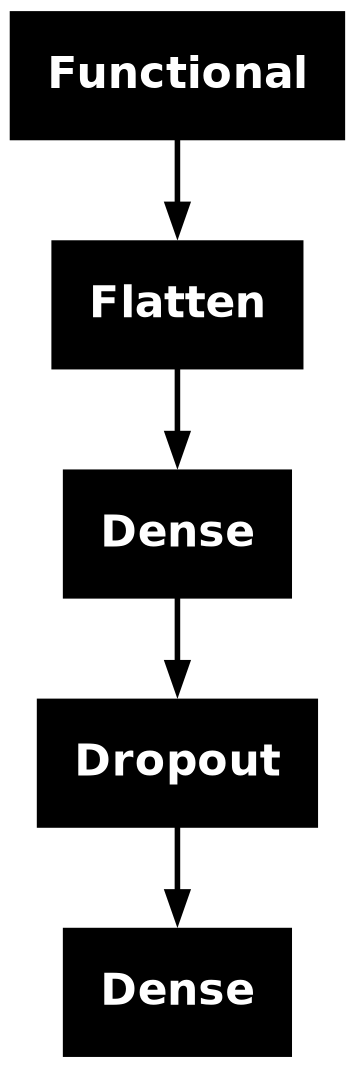

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [19]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.losses import SparseCategoricalCrossentropy

my_optimizer=tf.keras.optimizers.SGD(learning_rate=base_learning_rate,
                                            momentum=base_momentum)


model.compile(optimizer=my_optimizer,
                loss=SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [20]:
print(model.input_shape)
print(model.output_shape)

(None, 224, 224, 3)
(None, 10)


In [21]:
checkpoint_path = "training_1/transferLearning.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=initial_patience, restore_best_weights=True)

In [22]:


history = model.fit(
      training_dataset,
      epochs=40,
      validation_data=validation_dataset,callbacks = [cp_callback,es])

Epoch 1/40


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/359 ━━━━━━━━━━━━━━━━━━━━ 2:54:23 29s/step - accuracy: 0.1000 - loss: 4.9512

I0000 00:00:1712228402.704707      95 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712228402.757072      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 41/359 ━━━━━━━━━━━━━━━━━━━━ 6:06 1s/step - accuracy: 0.1363 - loss: 4.3273   

W0000 00:00:1712228448.906127      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 895ms/step - accuracy: 0.2007 - loss: 2.5647

W0000 00:00:1712228729.055231      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to training_1/transferLearning.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.2009 - loss: 2.5632 - val_accuracy: 0.5251 - val_loss: 1.3215
Epoch 2/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.4439 - loss: 1.4563
Epoch 2: saving model to training_1/transferLearning.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 283s 777ms/step - accuracy: 0.4439 - loss: 1.4561 - val_accuracy: 0.6385 - val_loss: 0.9985
Epoch 3/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.5351 - loss: 1.2333
Epoch 3: saving model to training_1/transferLearning.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 285s 782ms/step - accuracy: 0.5351 - loss: 1.2333 - val_accuracy: 0.6885 - val_loss: 0.8754
Epoch 4/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.5744 - loss: 1.1194
Epoch 4: saving model to training_1/transferLearning.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 280s 768ms/step - accuracy: 0.5744 - loss: 1.1194 - val_accuracy: 0.7242 - val_loss: 0.798

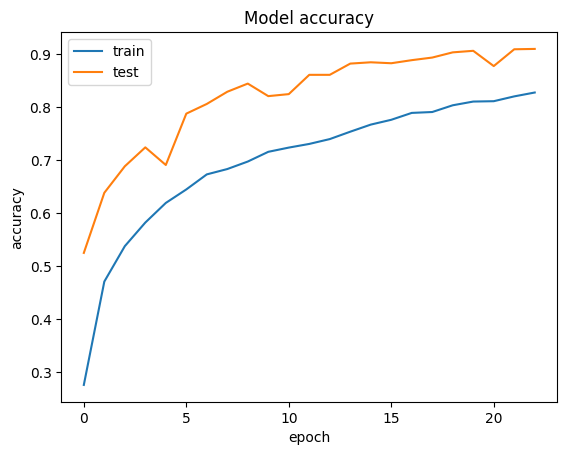

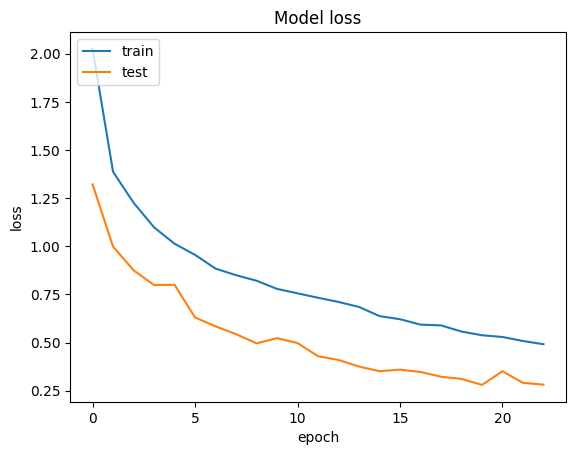

In [23]:
plot_train_history(history)

## Fine Tunning

In [24]:
checkpoint_path2 = "training_1/transferLearning.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

conv_base.trainable = True
for layer in conv_base.layers[:-15]:
    layer.trainable=False

# for layer in conv_base.layers:
#     print(layer.trainable)    

In [25]:
#model.load_weights("/kaggle/working/training_1/cp.weights.h5")

In [26]:
fine_tuning_optimizer =tf.keras.optimizers.Adam(learning_rate=0.00001)

In [27]:
cp_callback2 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path2,
                                                save_weights_only=True,
                                                verbose=1)

In [28]:
model.compile(optimizer=fine_tuning_optimizer,
                loss=SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [29]:
history = model.fit(
      training_dataset,
      epochs=60,
      validation_data=validation_dataset,callbacks = [cp_callback2])

Epoch 1/60
  1/359 ━━━━━━━━━━━━━━━━━━━━ 2:23:14 24s/step - accuracy: 0.8000 - loss: 0.8168

W0000 00:00:1712235134.372804      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 37/359 ━━━━━━━━━━━━━━━━━━━━ 4:37 861ms/step - accuracy: 0.8059 - loss: 0.5766

W0000 00:00:1712235165.398525      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.8241 - loss: 0.5012

W0000 00:00:1712235369.908440      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to training_1/transferLearning.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 318s 820ms/step - accuracy: 0.8241 - loss: 0.5011 - val_accuracy: 0.9339 - val_loss: 0.2143
Epoch 2/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.8484 - loss: 0.4260
Epoch 2: saving model to training_1/transferLearning.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 282s 773ms/step - accuracy: 0.8485 - loss: 0.4259 - val_accuracy: 0.9342 - val_loss: 0.2053
Epoch 3/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.8739 - loss: 0.3633
Epoch 3: saving model to training_1/transferLearning.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 284s 779ms/step - accuracy: 0.8739 - loss: 0.3633 - val_accuracy: 0.9458 - val_loss: 0.1759
Epoch 4/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.8788 - loss: 0.3532
Epoch 4: saving model to training_1/transferLearning.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 284s 779ms/step - accuracy: 0.8788 - loss: 0.3531 - val_accuracy: 0.9518 - val_loss: 0.

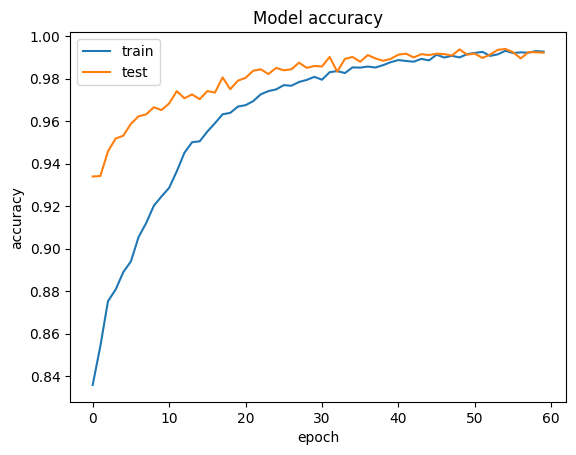

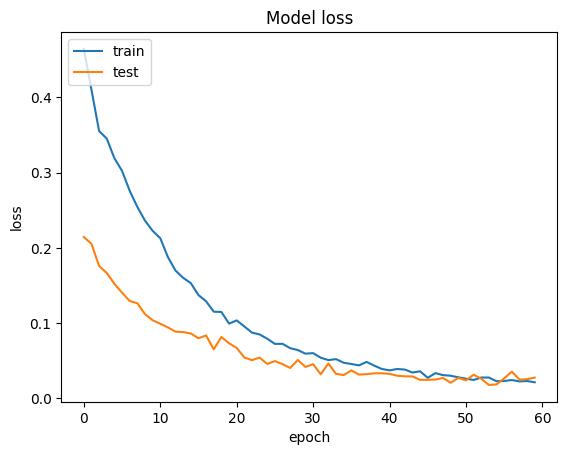

In [30]:
plot_train_history(history)